In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import plotnine as pn
import seaborn as sns
import scanpy.external as sce
import gseapy

In [7]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstr

In [9]:
heart_infection_sc = sc.read_h5ad(filename="./../../../pyobjs_github/heart_infection_sc.h5ad")
tcells = heart_infection_sc.raw.to_adata()[heart_infection_sc.obs["celltype_groups"].isin(["T cells"])]
sc.pp.filter_genes(tcells, min_cells = 10)
tcells

filtered out 9490 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 2460 × 13267
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_celltypes_leiden_0.5', 'rank_genes_groups_leiden_0.3', 'rank_genes_groups_leiden_0.5'

In [10]:
s_genes = list(pd.read_csv("./../../../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


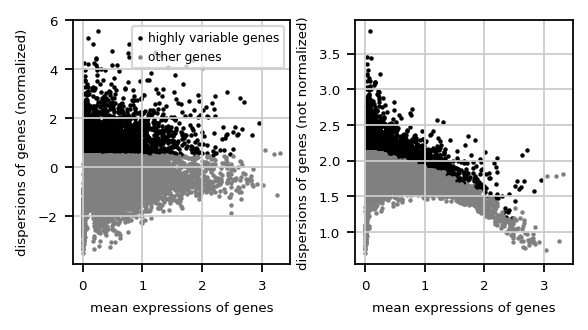

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    540 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    668 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:08)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


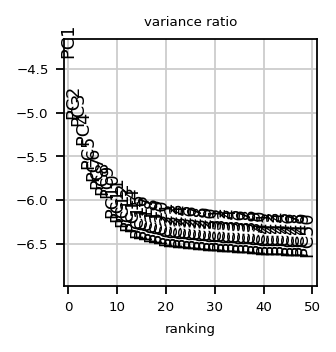

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 8 clusters and added
    'tcell_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'tcell_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)


In [11]:
sc.pp.normalize_total(tcells, target_sum=1e4)
sc.pp.log1p(tcells)
sc.pp.highly_variable_genes(tcells, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(tcells)
sc.tl.score_genes_cell_cycle(tcells, s_genes=s_genes, g2m_genes=g2m_genes, )
tcells.raw = tcells
tcells = tcells[:, tcells.var.highly_variable]
sc.pp.regress_out(tcells, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(tcells, max_value=10)
sc.tl.pca(tcells, svd_solver='arpack', random_state=0)
sc.pl.pca_variance_ratio(tcells, n_pcs = 50, log=True)
sc.pp.neighbors(tcells, n_pcs=20)
sc.tl.umap(tcells)
sc.tl.leiden(tcells, key_added="tcell_leiden_0.3", resolution = 0.3)
sc.tl.leiden(tcells, key_added="tcell_leiden_0.5", resolution = 0.5)

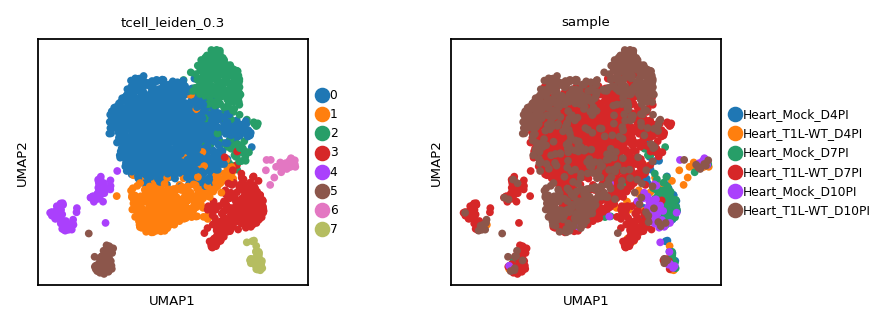

In [12]:
sc.pl.umap(tcells, color = ["tcell_leiden_0.3", "sample"])

In [13]:
tcells_only = tcells[~tcells.obs["tcell_leiden_0.3"].isin(["4", "5", "6", "7"]),]

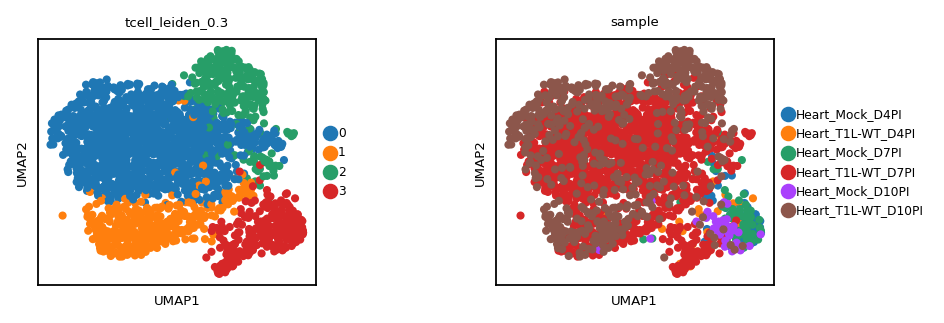

In [17]:
sc.pl.umap(tcells_only, color = ["tcell_leiden_0.3", "sample"], wspace=0.5)

In [14]:
sc.tl.rank_genes_groups(tcells_only, groupby='tcell_leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_tcell_leiden_0.3')

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups_tcell_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [15]:
pd.DataFrame(tcells_only.uns['rank_genes_groups_tcell_leiden_0.3']["names"]).head(20)

,0,1,2,3
0,Gzmb,Tnfrsf4,Ccl5,Rps24
1,Cd8a,Cd4,Gzma,Rps3
2,Gzmk,Ifitm3,Klf2,Tpt1
3,Gzma,Tnfrsf18,H2afz,Rpl32
4,Cd8b1,Gadd45b,Nkg7,Rps5
5,Ctla2a,Icos,Lgals1,Rps14
6,Jaml,S100a4,Cd48,Rpl8
7,Plac8,Maf,Klrd1,Rack1
8,Fgl2,Traf1,Emp3,Eef1a1
9,Cmtm7,Cxcr6,S100a10,Rplp0


In [55]:
tcells_only.obs["cell_phenotypes"] = tcells_only.obs["tcell_leiden_0.3"]
phenotypes = {'3': "Naive T-Cells", 
                '1': "Helper T-Cells", 
                '0': "Cytotoxic T-Cells-1",
                '2': "Cytotoxic T-Cells-2"}
tcells_only.obs["cell_phenotypes"] = tcells_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [56]:
sc.tl.rank_genes_groups(tcells_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [57]:
sc.tl.dendrogram(tcells_only, groupby='cell_phenotypes')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_phenotypes']`


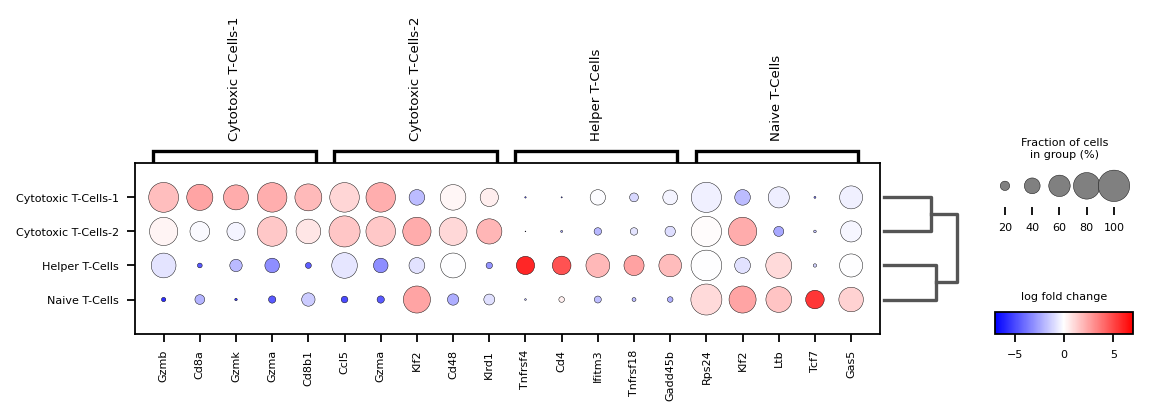

In [58]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (8.0,2.5))
sc.pl.rank_genes_groups_dotplot(tcells_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/tcell_dotplot.pdf")

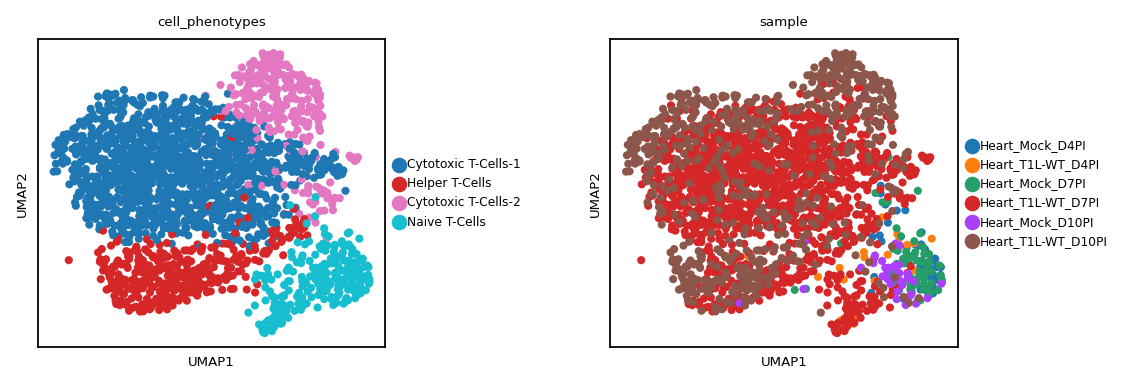

In [59]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
sc.pl.umap(tcells_only, color = ["cell_phenotypes", "sample"], wspace=0.5)

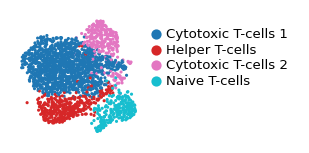

In [33]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(tcells_only, color = ["cell_phenotypes"], size=8, palette="tab10", frameon = False,  title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_tcells_celltypes_03.pdf")

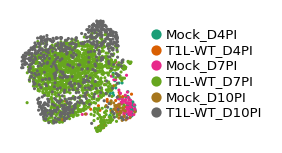

In [34]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, vector_friendly = False, figsize=(2.5, 2.5), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(tcells_only, color = ["condition"], size=8, palette="Dark2", frameon = False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_tcells_condition.pdf")

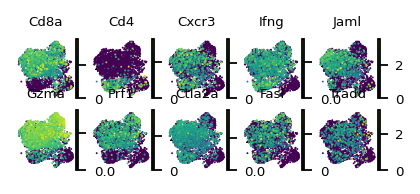

In [51]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.5, 0.5), transparent=True, format="pdf")
sc.pl.umap(tcells_only, color = ["Cd8a", "Cd4", "Cxcr3", "Ifng", "Jaml", "Gzma", "Prf1", "Ctla2a", "Fasl", "Tradd"], size=3, cmap="viridis", wspace = 0.15, hspace = 0.20, ncols=5, add_outline=False, frameon=False, save="tcellsfeatureplot.pdf")

In [60]:
tcells_only.write_h5ad("./../../../pyobjs_github/tcells_only.h5ad")

In [62]:
sc.tl.rank_genes_groups(tcells_only, groupby="cell_phenotypes", groups=["Cytotoxic T-Cells-1"], reference="Naive T-Cells", key_added="cyto_tcell_markers")

ranking genes
    finished: added to `.uns['cyto_tcell_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [64]:
cyto_tcell_markers = sc.get.rank_genes_groups_df(tcells_only, group="Cytotoxic T-Cells-1", key="cyto_tcell_markers")
cyto_tcell_markers.to_csv("./../../../csvs_github/tcell_only_cyto_tcell_markers.csv")
print(cyto_tcell_markers[1:25])

       names     scores  logfoldchanges          pvals      pvals_adj
1       Gzmk  43.739132        5.921732  5.835268e-243  7.741650e-239
2       Gzma  38.086094        4.987138  4.940684e-122  5.958914e-119
3     Lgals3  37.974148        5.393042  1.179033e-176  3.128447e-173
4     S100a4  37.223476        5.515797  4.737976e-187  1.571468e-183
5       Ccl4  37.038269        7.386068  1.727627e-216  1.146021e-212
6      Cxcr6  36.364277        6.641370  5.301245e-211  2.344387e-207
7       Ccl5  36.325771        4.969909  2.006376e-116  2.218215e-113
8     S100a6  36.046799        4.748246  9.496393e-109  7.874290e-106
9       Ifng  33.440498        5.504320  4.661838e-175  1.030810e-171
10       Id2  31.719345        4.311533  4.771825e-103  3.517100e-100
11     Klrk1  30.379124        6.157677  4.273624e-160  7.087272e-157
12  AA467197  27.362135        5.441418  1.345052e-134  1.784480e-131
13     Klrg1  27.309847        5.871300  6.351995e-135  9.363546e-132
14      Gng2  27.272

In [66]:
#?gseapy.enrichr
de_results = cyto_tcell_markers
de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(glist)

['Gzmb', 'Gzmk', 'Gzma', 'Lgals3', 'S100a4', 'Ccl4', 'Cxcr6', 'Ccl5', 'S100a6', 'Ifng', 'Id2', 'Klrk1', 'AA467197', 'Klrg1', 'Gng2', 'Anxa2', 'Ctla2a', 'Fgl2', 'Ccr2', 'Ccr5', 'Cmtm7', 'Mt1', 'Glrx', 'Prf1', 'Slamf7', 'S100a11', 'Gimap7', 'Havcr2', 'Bhlhe40', 'Tpi1', 'Efhd2', 'Lgals1', 'Gm19585', 'Ahnak', 'Pclaf', 'Nkg7', 'Rgs1', 'Ccl3', 'Fasl', 'Bcl2a1b', 'Wdr95', 'Mki67', 'Serpinb9', 'AW112010', 'Serpinb6b', 'Prc1', 'Lag3', 'Entpd1', 'Cmc2', 'Plac8', 'Hopx', 'Ifitm1', 'Esm1', 'Bcl2a1d', 'Ctsd', 'Sdf2l1', 'Tmem163', 'Atp8b4', 'Dapk2', 'Ly6c2', 'Itgax', 'Osbpl3', 'Itga1', 'Coro2a', 'Il18rap', 'Hip1', 'Ube2c', 'Gapdh', 'Plek', 'Atp2b4', 'Cd8a', 'Thy1', 'Lig1', 'Gm6637', 'Gmnn', 'Tbcb', 'Tnfrsf9', 'Smc2', 'Arsb', 'Lrrk1', 'Zeb2', 'Acadl', 'Rrm2', 'Ctsw', 'Cks1b', 'Spc24', 'Asf1b', 'Birc5', 'Bub1', 'Rrm1', 'Ncapg', 'Sytl2', 'Gpr68', 'Plk1', 'Pgk1', 'Aldoa', 'Txn1', 'Hist1h1b', 'Tyms', 'Il12rb2', 'Cdca3', 'Aspm', 'Tspan31', 'Tuba1b', 'Litaf', 'Cdca8', 'Kif11', 'Nucb1', 'Acot7', 'Il2rb', 'K

In [67]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:c93050ee8425d0c563d24ddcb71e95e9
Done.



In [103]:
enr_res.results[160:192]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-log p-value
206,GO_Biological_Process_2021,regulation of viral transcription (GO:0046782),19/41,0.000287,0.007295,0,0,3.216202,26.232740,IFITM3;LARP7;GTF2F1;GTF2F2;TARBP2;CDK9;MDFIC;P...,2.136949
207,GO_Biological_Process_2021,"base-excision repair, gap-filling (GO:0006287)",17/35,0.000297,0.007505,0,0,3.516363,28.564324,RFC5;FEN1;RFC3;PARG;PCNA;RFC4;LIG1;RFC2;RPA1;R...,2.124634
208,GO_Biological_Process_2021,regulation of cytokinesis (GO:0032465),32/84,0.000302,0.007609,0,0,2.294397,18.595425,CETN2;KIF14;CDC14A;AURKB;AURKA;CDC42;SPAST;RAC...,2.118662
209,GO_Biological_Process_2021,positive regulation of hydrolase activity (GO:...,50/149,0.000313,0.007858,0,0,1.885450,15.211344,ARHGAP11A;ITGB1;NDUFA13;DOCK8;HMGB2;DOCK10;FNT...,2.104684


<ipython-input-105-2582a4d97b91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(15, 11)


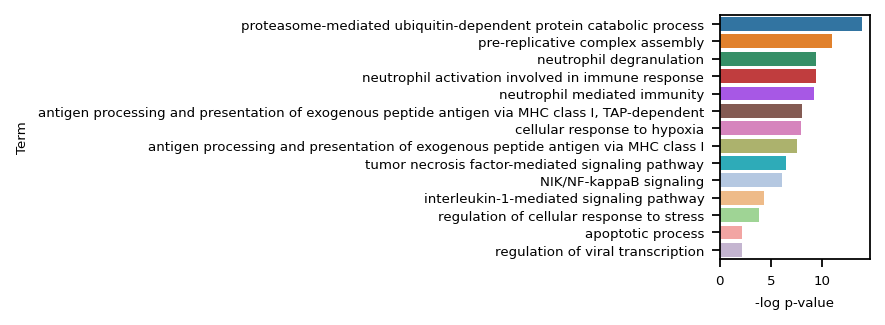

In [105]:
GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results = GO_results.iloc[[1,8,12,21,22,24,36,37,41,54,62,90,108,191,206],]
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]
print(GO_results.shape)

sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(1.2,2.0))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[1:20], ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# plt.tight_layout()
# plt.show()
plt.savefig("figures/go_enrich_cyto_tcells.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [75]:
heart_infection_visium_no_viral_genes = sc.read_h5ad('./../../../pyobjs_github/T1L_heart_D7PI.h5ad')

In [106]:
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[1,"Genes"].split(";")], use_raw=True, score_name = 'tcells_microtubule_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[8,"Genes"].split(";")], use_raw=True, score_name = 'tcells_proteosome_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[21,"Genes"].split(";")], use_raw=True, score_name = 'tcells_neutrophil_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[41,"Genes"].split(";")], use_raw=True, score_name = 'tcells_ap_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[54,"Genes"].split(";")], use_raw=True, score_name = 'tcells_tnf_activity_score') 
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[62,"Genes"].split(";")], use_raw=True, score_name = 'tcells_nfkb_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[90,"Genes"].split(";")], use_raw=True, score_name = 'tcells_il1_activity_score')

sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[206,"Genes"].split(";")], use_raw=True, score_name = 'tcells_viral_transcription_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[191,"Genes"].split(";")], use_raw=True, score_name = 'tcells_apoptosis_activity_score')

computing score 'tcells_microtubule_activity_score'
    finished: added
    'tcells_microtubule_activity_score', score of gene set (adata.obs).
    947 total control genes are used. (0:00:00)
computing score 'tcells_proteosome_activity_score'
    finished: added
    'tcells_proteosome_activity_score', score of gene set (adata.obs).
    844 total control genes are used. (0:00:00)
computing score 'tcells_neutrophil_activity_score'
    finished: added
    'tcells_neutrophil_activity_score', score of gene set (adata.obs).
    789 total control genes are used. (0:00:00)
computing score 'tcells_ap_activity_score'
    finished: added
    'tcells_ap_activity_score', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'tcells_tnf_activity_score'
    finished: added
    'tcells_tnf_activity_score', score of gene set (adata.obs).
    796 total control genes are used. (0:00:00)
computing score 'tcells_nfkb_activity_score'
    finished: added
    'tcells_n

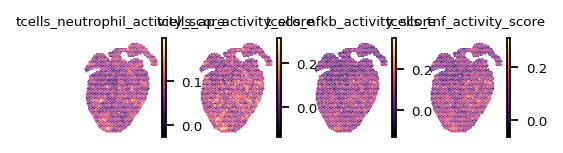

In [108]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["tcells_neutrophil_activity_score", 'tcells_ap_activity_score', "tcells_nfkb_activity_score", "tcells_tnf_activity_score"],
              ncols=4, frameon=False, cmap = "magma",
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "tcells_spatial_module_scores.pdf")

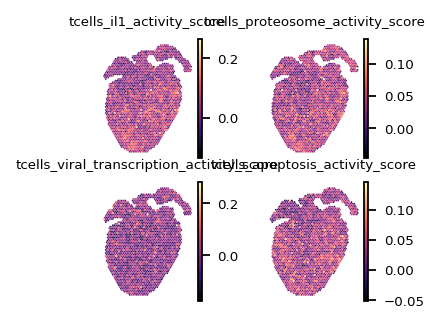

In [109]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.0,1.0), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["tcells_il1_activity_score", 'tcells_proteosome_activity_score', "tcells_viral_transcription_activity_score", "tcells_apoptosis_activity_score" ], ncols=2, frameon=False, 
              library_id='T1L-Heart-D7PI',  cmap = "magma", size=1.5, scale_factor=1.0, hspace=0.2, wspace=0.2, save = "tcells_spatial_supp_module_scores.pdf")

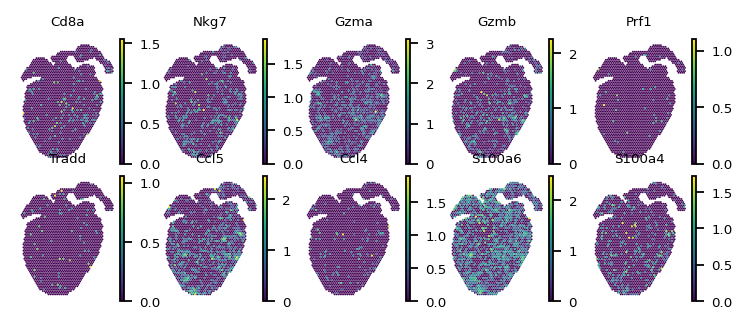

In [82]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.0, 1.0), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["Cd8a", "Nkg7", "Gzma", "Gzmb", "Prf1", "Tradd", "Ccl5", "Ccl4", "S100a6", "S100a4"], ncols=5, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "tcellsspatialfeatureplot.pdf")